In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

In [2]:
df = pd.read_csv('C:/Users/Zhangchensi/bootcamp_Chensi_Zhang/project/data/processed/processed_data.csv')
df = df.set_index(df.columns[0])
df.index.name = None
df

,open,high,low,close,volume,year
2015-01-02,0.050354,0.046686,0.043518,0.045676,0.130251,2015
2015-01-05,0.043057,0.040097,0.038797,0.038268,0.164745,2015
2015-01-06,0.038937,0.037216,0.036898,0.038292,0.169450,2015
2015-01-07,0.040491,0.039035,0.041924,0.041876,0.089477,2015
2015-01-08,0.045269,0.048362,0.046804,0.051834,0.149426,2015
...,...,...,...,...,...,...
2025-08-13,0.332094,0.338466,0.343085,0.343933,0.182155,2025
2025-08-14,0.339121,0.338749,0.344107,0.342610,0.126241,2025
2025-08-15,0.338991,0.336765,0.340420,0.339747,0.139073,2025
2025-08-18,0.333577,0.334026,0.342306,0.338064,0.081290,2025


In [3]:
X = df[['open','high','low','volume']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.9975  RMSE=0.002806


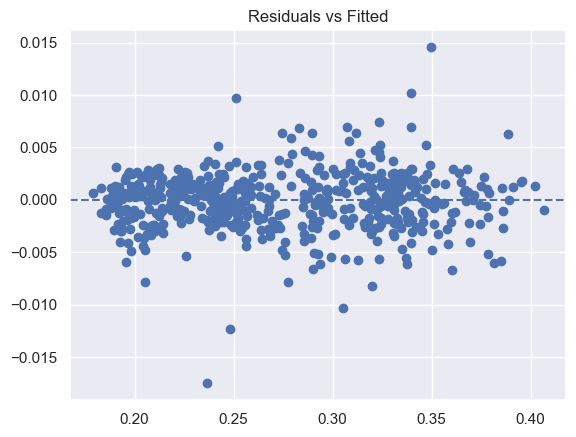

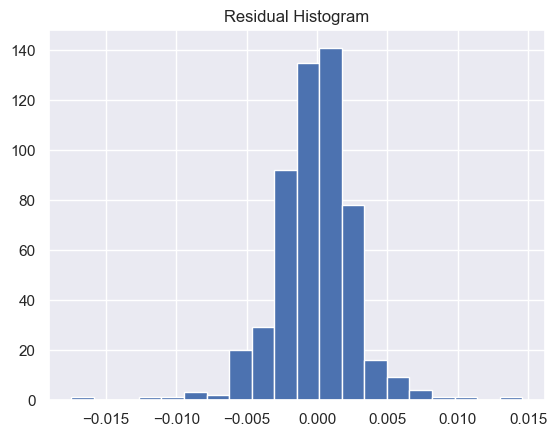

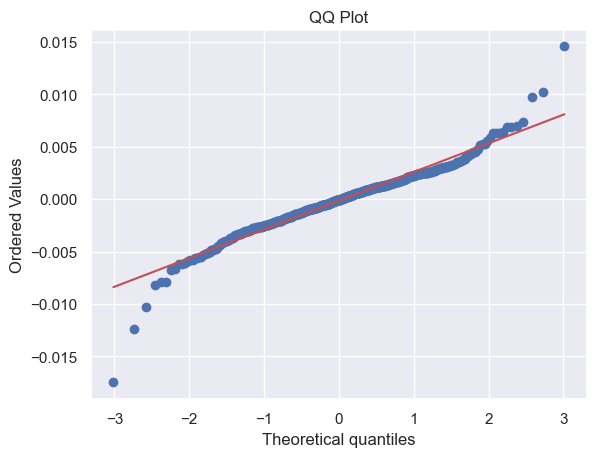

In [4]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

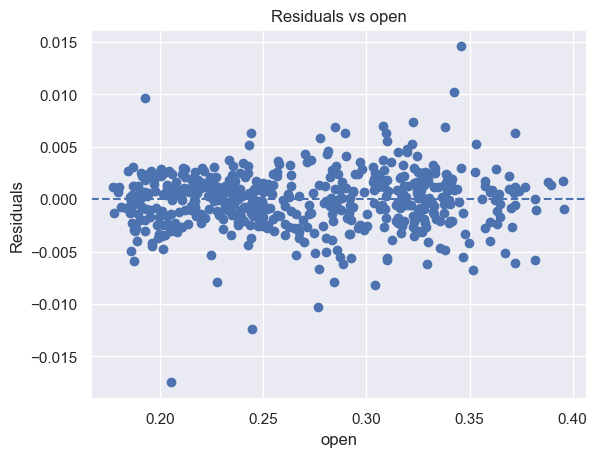

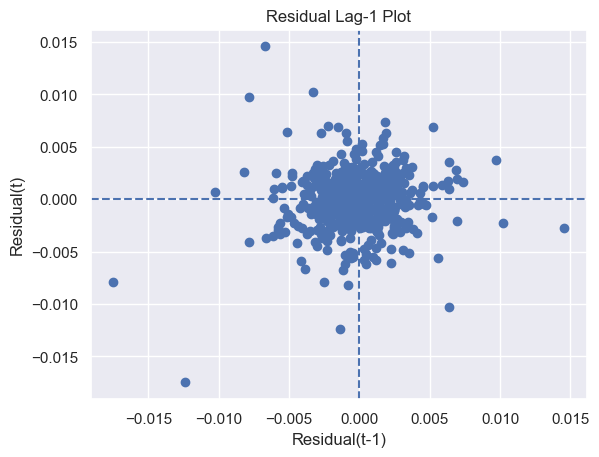

In [7]:
plt.figure(); plt.scatter(X_test['open'], resid); plt.axhline(0, ls='--'); 
plt.title('Residuals vs open'); plt.xlabel('open'); plt.ylabel('Residuals'); plt.show()

plt.figure(); plt.scatter(resid[:-1], resid[1:]); plt.axhline(0, ls='--'); plt.axvline(0, ls='--');
plt.title('Residual Lag-1 Plot'); plt.xlabel('Residual(t-1)'); plt.ylabel('Residual(t)'); plt.show()

In [13]:
import statsmodels.api as sm

def sklearn_regression_summary(lr, X, y):

    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])
    
    X_sm = sm.add_constant(X)
    ols_model = sm.OLS(y, X_sm).fit()
    
    summary_df = pd.DataFrame({
        "coef": ols_model.params,
        "std err": ols_model.bse,
        "t": ols_model.tvalues,
        "p": ols_model.pvalues
    })
    
    return summary_df

In [14]:
print(sklearn_regression_summary(lr, X, y))

            coef   std err          t              p
const   0.001364  0.000157   8.701661   5.619085e-18
open   -0.602669  0.016231 -37.131328  1.192239e-243
high    0.805423  0.014445  55.759661   0.000000e+00
low     0.790705  0.014719  53.721429   0.000000e+00
volume -0.000466  0.000652  -0.715239   4.745241e-01


assumptions:The dependent variable Y has a linear relationship with the four independent variables;No perfect multicollinearity;The explanatory variables are uncorrelated with the error term;No autocorrelation；Normality